# LUXE-NPOD Background Studies

Studies on kinematics distributions using LUXE signal samples.

We use two phase-0 samples:
- e0ppw_3.0_g4{0-4}
- e0ppw_7.0_g4{0-4}

Our reference page for LUXE signal MC samples is https://confluence.desy.de/display/LS/Signal+MC.

The notebook is base on uproot and pandas, and I am following the basic uproot documentation here: https://uproot.readthedocs.io/en/latest/basic.html

In [1]:
import numpy as np
import pandas as pd

In [2]:
import uproot

Our signal samples are stored at KIT in Torben's /ceph directory: 
`/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw`

In [3]:
!ls /ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw

e0ppw_3_0_0_particles_g4.root  e0ppw_7_0_0_particles_g4.root
e0ppw_3_0_1_particles_g4.root  e0ppw_7_0_1_particles_g4.root
e0ppw_3_0_2_particles_g4.root  e0ppw_7_0_2_particles_g4.root
e0ppw_3_0_3_particles_g4.root  e0ppw_7_0_3_particles_g4.root


In [4]:
# For now, open just one file
phase0_folder = "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/"

file_3_0 = uproot.open(phase0_folder + "e0ppw_3_0_0_particles_g4.root")

file_3_0

<ReadOnlyDirectory '/' at 0x7f25a3688208>

In [5]:
file_3_0["Tracks"]

<TTree 'Tracks' (26 branches) at 0x7f25a3ac1cc0>

We are interested in the `Tracks` TTree

In [43]:
# Get access to the 'Tracks' TTree 
Tracks = uproot.open(phase0_folder + "e0ppw_3_0_0_particles_g4.root:Tracks")


In [28]:
# Show branches in "Tracks"
Tracks.keys()

['eventid',
 'trackid',
 'detid',
 'pdg',
 'physproc',
 'E',
 'x',
 'y',
 'z',
 't',
 'vtxx',
 'vtxy',
 'vtxz',
 'px',
 'py',
 'pz',
 'theta',
 'phi',
 'xlocal',
 'ylocal',
 'zlocal',
 'weight',
 'ptrackid',
 'nsecondary',
 'esecondary',
 'runid']

In [44]:
# Defining data frame from Tracks tree with the interesting variables
df = Tracks.arrays(["E", "pdg","detid","weight","theta","phi","vtxx","vtxy","vtxz","px","py","pz","x","y","z"], library="pd")

In [51]:
files_list = [phase0_folder + "e0ppw_3_0_0_particles_g4.root:Tracks",
              phase0_folder + "e0ppw_3_0_1_particles_g4.root:Tracks",
              phase0_folder + "e0ppw_3_0_2_particles_g4.root:Tracks",
              phase0_folder + "e0ppw_3_0_3_particles_g4.root:Tracks"]

list_df = []

for file in files_list:
    t = uproot.open(file)
    list_df.append(t.arrays(["E", "pdg","detid","weight","theta","phi","vtxx","vtxy","vtxz","px","py","pz","x","y","z"], library="pd"))


In [103]:
df = list_df[0]

for i in range(1,len(list_df)):
    df = pd.concat([df,list_df[i]])
    
df

E  pdg  detid  weight     theta       phi  \
entry  subentry                                                      
0      0         14.196312   11     -1  1500.0  0.000018 -0.493868   
       1         14.196312   11   5100  1500.0  0.024136 -3.141243   
       2         14.195931   11   6000  1500.0  0.024163 -3.139890   
       3         14.195619   11   6101  1500.0  0.024211  3.140004   
       4         14.195619   11  21000  1500.0  0.024211  3.140004   
...                    ...  ...    ...     ...       ...       ...   
922036 20         0.000123   22  21000     1.0  2.289324  0.601598   
       21         0.000150   22   2000     1.0  2.741878 -1.237458   
       22         0.000152   22   2000     1.0  1.178298 -1.990184   
       23         0.000112   22   2000     1.0  0.846320 -2.003077   
       24         0.000250   22   2000     1.0  0.887130  1.362231   

                       vtxx      vtxy         vtxz        px        py  \
entry  subentry                                                          
0      0           0.004201  0.002999     0.017162  0.000222 -0.000120   
       1           0.004201  0.002999     0.017162 -0.342617 -0.000120   
       2           0.004201  0.002999     0.017162 -0.343001 -0.000584   
       3           0.004201  0.002999     0.017162 -0.343663  0.000546   
       4           0.004201  0.002999     0.017162 -0.343663  0.000546   
...                     ...       ...          ...       ...       ...   
922036 20        192.707982  6.201579  4424.266753  0.000076  0.000052   
       21        191.702019  6.518576  4430.466054  0.000019 -0.000055   
       22        186.389745  1.432988  4357.028579 -0.000057 -0.000128   
       23        188.298970  2.196672  4356.044513 -0.000035 -0.000076   
       24        188.289941 -6.404347  4385.093261  0.000040  0.000190   

                        pz           x          y            z  
entry  subentry                                                 
0      0         14.196823    0.004201   0.002999     0.017162  
       1         14.192688  -14.773587  -0.019348  2650.000000  
       2         14.192298  -82.419589  -0.090537  5450.000000  
       3         14.191970  -91.406664  -0.073653  5820.840000  
       4         14.191970  -91.406666  -0.073653  5820.840100  
...                    ...         ...        ...          ...  
922036 20        -0.000081 -229.338903  86.764623  5829.840100  
       21        -0.000139  253.927931 -14.173638  4434.542000  
       22         0.000058  140.947151  27.500000  4374.058628  
       23         0.000075  137.599423  27.500000  4360.624470  
       24         0.000158  201.659122 -27.500000  4417.718756  

[25303273 rows x 15 columns]

## Background studies

We want to check which events produces signatures that can mimic our signal:
- two neutrons
- two photons
- one neutron and one photon

To do so, we look at what hits our BSM calorimeter (for the moment, just a dummy volume).

We identify tracks reaching the BSM calorimeter by requiring `detid` = 9000.

In [104]:
df_bsm = df[df["detid"]==9000]
df_bsm.head(10)

E   pdg  detid  weight     theta       phi  \
entry subentry                                                          
3     7         3.146772e-11  2112   9000  1500.0  2.280119 -0.162854   
4     5         1.186435e-10  2112   9000  1500.0  1.099726  0.255745   
71    7         4.706856e-09  2112   9000  1500.0  2.237677  2.527939   
84    5         1.972340e-04  2112   9000  1500.0  0.312968 -0.994069   
      6         1.035873e-04  2112   9000  1500.0  0.563941 -1.829657   
205   10        1.232279e-03   -12   9000  1500.0  0.130703  0.516156   
206   7         1.341501e-03   -12   9000  1500.0  0.553284  0.482709   
225   7         3.559692e-10  2112   9000  1500.0  0.522711 -1.314990   
236   5         1.843594e-06  2112   9000  1500.0  0.165706 -0.245008   
243   41        4.525873e-12  2112   9000  1500.0  0.340498 -2.843154   

                       vtxx         vtxy         vtxz            px  \
entry subentry                                                        
3     7        -1943.605506  2234.565707  9538.199789  5.757789e-06   
4     5         -119.834466     6.857973  7319.632572  1.287237e-05   
71    7         -113.902234    -2.553101  7321.278954 -6.041502e-05   
84    5          118.895719   111.979832  9077.613133  3.232220e-03   
      6          118.895719   111.979832  9077.613133 -1.909034e-03   
205   10        -951.281385  -156.848640  5339.943914  1.396818e-04   
206   7        -3185.414119 -2495.685199  9226.383862  6.243923e-04   
225   7         -122.284250     0.143820  7328.524889  3.267009e-06   
236   5         -125.705188    10.690421  7353.648692  2.978458e-04   
243   41        -377.167640  -191.355322  7230.406714 -9.308626e-07   

                          py        pz           x           y         z  
entry subentry                                                            
3     7        -9.460598e-07 -0.000005 -446.376797 -478.625924  16178.06  
4     5         3.365739e-06  0.000007  574.020567   58.818575  16000.00  
71    7         4.255464e-05 -0.000058 -446.206397  870.202206  16178.06  
84    5        -4.968815e-03  0.018318  462.739071  473.245123  16000.00  
      6        -7.209289e-03  0.011792  447.515809 -604.981044  16000.00  
205   10        7.926499e-05  0.001222  267.456614  534.746690  16000.00  
206   7         3.272181e-04  0.001141  520.181232 -553.736632  16000.00  
225   7        -1.249162e-05  0.000022 -560.956969   73.455130  16000.00  
236   5        -7.447068e-05  0.001836  371.684502  547.009540  16000.00  
243   41       -2.863577e-07  0.000003 -243.495758  697.114095  16000.00

### Two neutron case
We start by looking at events with two neutrons. We select neutrons using the `pdg` variable, that for neutrons is `2112`.

In [190]:
# Select events with exactly two neutrons
def get_sum(df_bsm):
    """Returns sum of 'pdg' values in each event"""
    return sum(df_bsm['pdg'])

def is_neutron(df_bsm):
    """Returns number of neutrons in each event"""
    return sum(df_bsm['pdg'] == 2112)


# We create a pandas series on the 'entry' index. It is a boolean series telling if each event has EXACTLY two neutrons
list_nn = df_bsm.groupby('entry').apply(get_sum)==4224

# We create a pandas series on the 'entry' index. It is a boolean series telling if each event has AT LEAST two neutrons
list_multi_n = df_bsm.groupby('entry').apply(is_neutron) > 1

entry
84        True
230       True
243       True
329       True
347       True
          ... 
923938    True
923997    True
924261    True
924423    True
924630    True
Length: 12304, dtype: bool


In [ ]:
# We convert the series into a 'mask' that we use to filter the dataframe
# mask_nn = list_nn[list_nn==True].index # Exactly and only two neutrons in the event
mask_nn = list_multi_n[list_multi_n==True].index # At least two neutrons in the event

In [185]:
# Here we filter
df_bsm_nn = df_bsm.loc[mask_nn]
df_bsm_nn.head(10)

In [161]:
# Sort by neutron Energy
df_bsm_nn_sort = df_bsm_nn.groupby('entry').apply(lambda x: x.sort_values(['E'], ascending=False))

In [191]:
# Since we require at least two neutrons, but we do not filter on additional particles, we do it now
df_bsm_nn_sort_filter = df_bsm_nn_sort[df_bsm_nn_sort['pdg'] == 2112]

E   pdg  detid  weight     theta       phi  \
entry  entry  subentry                                                          
84     84     5         1.972340e-04  2112   9000  1500.0  0.312968 -0.994069   
              6         1.035873e-04  2112   9000  1500.0  0.563941 -1.829657   
230    230    7         1.009621e-07  2112   9000  1500.0  0.698448 -2.270558   
              8         3.339997e-08  2112   9000  1500.0  0.400439  0.217473   
243    243    46        3.770494e-09  2112   9000  1500.0  0.553394  0.198595   
...                              ...   ...    ...     ...       ...       ...   
924261 924261 5         1.251515e-07  2112   9000  1500.0  2.149693  0.932560   
924423 924423 4         1.300136e-04  2112   9000  1500.0  2.896640 -2.532894   
              5         6.137371e-05  2112   9000  1500.0  1.350912 -0.716007   
924630 924630 4         1.975715e-09  2112   9000  1500.0  2.067120  1.139410   
              5         1.346004e-09  2112   9000  1500.0  3.071101  0.663856   

                              vtxx        vtxy          vtxz        px  \
entry  entry  subentry                                                   
84     84     5         118.895719  111.979832   9077.613133  0.003232   
              6         118.895719  111.979832   9077.613133 -0.001909   
230    230    7        -140.048944   -2.039424   7334.034342 -0.000180   
              8        -140.048944   -2.039424   7334.034342  0.000095   
243    243    46        -99.804831 -102.362194   7560.556186  0.000043   
...                            ...         ...           ...       ...   
924261 924261 5         -55.248151  116.032978  14108.978798  0.000242   
924423 924423 4          -0.282390    0.385053  13860.875020 -0.003110   
              5          -0.282390    0.385053  13860.875020  0.007907   
924630 924630 4          11.294173   24.155465  13879.925915  0.000022   
              5          11.294173   24.155465  13879.925915  0.000003   

                              py        pz           x           y         z  
entry  entry  subentry                                                        
84     84     5        -0.004969  0.018318  462.739071  473.245123  16000.00  
              6        -0.007209  0.011792  447.515809 -604.981044  16000.00  
230    230    7        -0.000214  0.000334 -242.995976 -749.594364  16000.00  
              8         0.000021  0.000231  398.579411  -77.363873  16000.00  
243    243    46        0.000009  0.000072  533.861470  263.298398  16000.00  
...                          ...       ...         ...         ...       ...  
924261 924261 5         0.000326 -0.000265 -778.226615 -290.031710  16178.06  
924423 924423 4        -0.002168 -0.015164 -684.896613 -331.041064  16178.06  
              5        -0.006879  0.002342 -395.150536  859.901924  16000.00  
924630 924630 4         0.000049 -0.000029 -448.485291 -435.859049  16178.06  
              5         0.000002 -0.000050 -975.706552 -736.177484  16178.06  

[24608 rows x 15 columns]

Now we build some interesting kinematic variables, per event.

In [113]:
df_nn_kinematics = pd.DataFrame()

In [114]:
# Delta phi 
def delta_phi(df_nn_kinematics):
    d_phi = df_nn_kinematics['phi_1'] - df_nn_kinematics['phi_2']    
    if d_phi >= np.pi: d_phi = d_phi - 2*np.pi
    if d_phi < -np.pi: d_phi = d_phi + 2*np.pi
    return d_phi


# Copying TLorentzVector definition https://root.cern.ch/doc/master/TLorentzVector_8h_source.html#l00498
def inv_mass(E_1, px_1, py_1, pz_1,
             E_2, px_2, py_2, pz_2):
    return np.sqrt( np.absolute((E_1+E_2)**2 - (px_1+px_2)**2 - (py_1+py_2)**2 - (pz_1+pz_2)**2) )
    

In [192]:
# Dirty trick to have the first and second particles: create two separate dataframes
# with the first and last (~second) subentry
df_bsm_nn_first = df_bsm_nn_sort_filter.groupby('entry').first()
df_bsm_nn_second = df_bsm_nn_sort_filter.groupby('entry').last()

In [193]:
# Event variables
df_nn_kinematics["weight"] = df_bsm_nn_first["weight"]

# Build first particle
df_nn_kinematics["E_1"] = df_bsm_nn_first["E"]
df_nn_kinematics["m_1"] = 0.939565
df_nn_kinematics["eta_1"] = -np.log(np.tan(0.5*df_bsm_nn_first["theta"]))
df_nn_kinematics["theta_1"] = df_bsm_nn_first["theta"]
df_nn_kinematics["phi_1"] = df_bsm_nn_first["phi"]
df_nn_kinematics["vtxx_1"] = df_bsm_nn_first["vtxx"]
df_nn_kinematics["vtxy_1"] = df_bsm_nn_first["vtxy"]
df_nn_kinematics["vtxz_1"] = df_bsm_nn_first["vtxz"]
df_nn_kinematics["px_1"] = df_bsm_nn_first["px"]
df_nn_kinematics["py_1"] = df_bsm_nn_first["py"]
df_nn_kinematics["pz_1"] = df_bsm_nn_first["pz"]
df_nn_kinematics["x_1"] = df_bsm_nn_first["x"]
df_nn_kinematics["y_1"] = df_bsm_nn_first["y"]
df_nn_kinematics["z_1"] = df_bsm_nn_first["z"]

# Build second particle
df_nn_kinematics["E_2"] = df_bsm_nn_second["E"]
df_nn_kinematics["m_2"] = 0.939565
df_nn_kinematics["eta_2"] = -np.log(np.tan(0.5*df_bsm_nn_second["theta"]))
df_nn_kinematics["theta_2"] = df_bsm_nn_second["theta"]
df_nn_kinematics["phi_2"] = df_bsm_nn_second["phi"]
df_nn_kinematics["vtxx_2"] = df_bsm_nn_second["vtxx"]
df_nn_kinematics["vtxy_2"] = df_bsm_nn_second["vtxy"]
df_nn_kinematics["vtxz_2"] = df_bsm_nn_second["vtxz"]
df_nn_kinematics["px_2"] = df_bsm_nn_second["px"]
df_nn_kinematics["py_2"] = df_bsm_nn_second["py"]
df_nn_kinematics["pz_2"] = df_bsm_nn_second["pz"]
df_nn_kinematics["x_2"] = df_bsm_nn_second["x"]
df_nn_kinematics["y_2"] = df_bsm_nn_second["y"]
df_nn_kinematics["z_2"] = df_bsm_nn_second["z"]


In [194]:
# df_nn_kinematics["particle_1"] = Momentum4.e_m_eta_phi(df_nn_kinematics["E_1"],
#                                                       df_nn_kinematics["m_1"],
#                                                       df_nn_kinematics["eta_1"],
#                                                       df_nn_kinematics["phi_1"])

In [195]:
df_nn_kinematics["m_nn"] = inv_mass(df_nn_kinematics["E_1"], df_nn_kinematics["m_1"], df_nn_kinematics["eta_1"], df_nn_kinematics["phi_1"],
                                    df_nn_kinematics["E_2"], df_nn_kinematics["m_2"], df_nn_kinematics["eta_2"], df_nn_kinematics["phi_2"])

In [196]:
# particle distance from the center of the detector
df_nn_kinematics["r_1"] = np.sqrt(df_nn_kinematics["x_1"]**2 + df_nn_kinematics["y_1"]**2)
df_nn_kinematics["r_2"] = np.sqrt(df_nn_kinematics["x_2"]**2 + df_nn_kinematics["y_2"]**2)

# Distance between the two particles at the detector surface
df_nn_kinematics["dist_n1_n2"] = np.sqrt( (df_nn_kinematics["x_2"] - df_nn_kinematics["x_1"])**2 + (df_nn_kinematics["y_1"] - df_nn_kinematics["y_2"])**2)


In [197]:
# Delta_phi between neutrons
df_nn_kinematics["delta_phi"] = df_nn_kinematics.apply(delta_phi, axis = 1)
df_nn_kinematics[['phi_1','phi_2','delta_phi']].head(5)


,phi_1,phi_2,delta_phi
entry,,,
84,-0.994069,-1.829657,0.835588
230,-2.270558,0.217473,-2.488030
243,0.198595,-2.843154,3.041749
329,-1.876028,-0.161213,-1.714815
347,-2.160607,-2.127969,-0.032638


In [198]:
# Having a look at the dataframe
df_nn_kinematics.head(5)

,weight,E_1,m_1,eta_1,theta_1,phi_1,vtxx_1,vtxy_1,vtxz_1,px_1,...,py_2,pz_2,x_2,y_2,z_2,m_nn,r_1,r_2,dist_n1_n2,delta_phi
entry,,,,,,,,,,,,,,,,,,,,,
84,1500.0,1.972340e-04,0.939565,1.846594,0.312968,-0.994069,118.895719,111.979832,9077.613133,0.003232,...,-7.209289e-03,0.011792,447.515809,-604.981044,16000.000000,4.585316,661.882463,752.510773,1078.333629,0.835588
230,1500.0,1.009621e-07,0.939565,1.010192,0.698448,-2.270558,-140.048944,-2.039424,7334.034342,-0.000180,...,2.107143e-05,0.000231,398.579411,-77.363873,16000.000000,3.812158,787.996672,406.018122,929.253899,-2.488030
243,1500.0,3.770494e-09,0.939565,1.258845,0.553394,0.198595,-99.804831,-102.362194,7560.556186,0.000043,...,-2.863577e-07,0.000003,-243.495758,697.114095,16000.000000,4.432027,595.259704,738.416038,890.213637,3.041749
329,1500.0,2.969933e-07,0.939565,0.908913,0.766114,-1.876028,289.324803,-441.479994,3955.406065,-0.000156,...,-8.432935e-05,0.000027,-1002.500000,-942.848876,16134.867199,2.933428,454.520545,1376.215918,1243.993121,-1.714815
347,1500.0,2.135572e-10,0.939565,0.740633,0.889852,-2.160607,-98.365476,58.558234,7330.087670,-0.000009,...,-1.852729e-06,0.000004,-745.660341,-586.272996,16000.000000,5.123253,1002.525174,948.538544,1846.120640,-0.032638


Now, finally plotting. We define a function for that, and then we plot few distributions.

In [199]:
import matplotlib.pyplot as plt

def plot_histo(df, variable, weight=1, title="", x_label="", y_label="", file_name=None, file_format="png"):
    """Plots distributions from a dataframe

    df: input dataframe
    variable: distribution to plot
    title: appears on top of the plot
    weight: weight to apply to the histogram
    x_label: label of x-axis
    y_label: label of y-axis
    file_name: if not empty, name of file where plot is printed
    file_format: if file_name not empty, format of output file
    """

    # Prepare histogram
    df[variable].plot(kind='hist', weights=weight)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Preparing output
    if file_name:
        plt.savefig(file_name + "." + file_format)
        


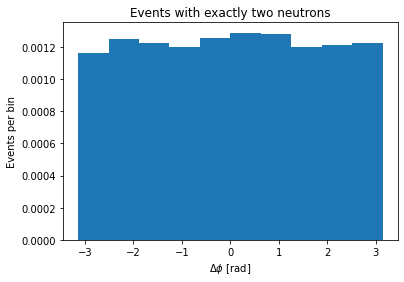

In [200]:
# Delta-phi(n,n)
plot_histo(df_nn_kinematics, 'delta_phi', 
           weight    = df_nn_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two neutrons", 
           x_label   = r"$\Delta \phi$ [rad]", 
           y_label   = "Events per bin",
           file_name = "delta_phi_nn")

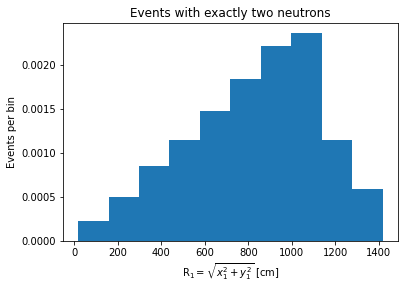

In [201]:
# r_1: distance of first neutron from the center of the detector
plot_histo(df_nn_kinematics, 'r_1', 
           weight    = df_nn_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two neutrons", 
           x_label   = "R$_1 = \sqrt{x_1^2 + y_1^2}$ [cm]", 
           y_label   = "Events per bin",
           file_name = "r_1_nn")


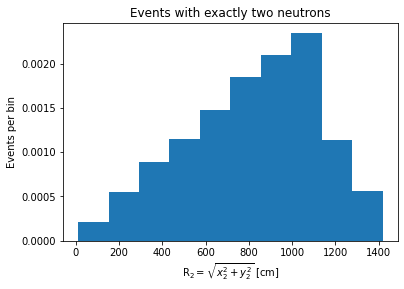

In [202]:
# r_2: distance of second neutron from the center of the detector
plot_histo(df_nn_kinematics, 'r_2', 
           weight    = df_nn_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two neutrons", 
           x_label   = "R$_2 = \sqrt{x_2^2 + y_2^2}$ [cm]", 
           y_label   = "Events per bin",
           file_name = "r_2_nn")


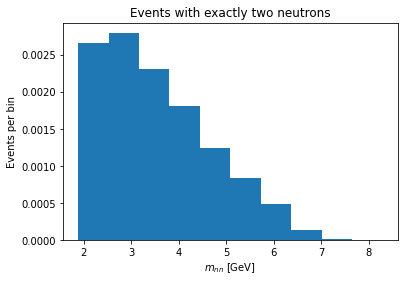

In [203]:
# m_nn: invariant mass of the two neutrons system
plot_histo(df_nn_kinematics, 'm_nn', 
           weight    = df_nn_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two neutrons", 
           x_label   = "$m_{nn}$ [GeV]",
           y_label   = "Events per bin",
           file_name = "m_nn")


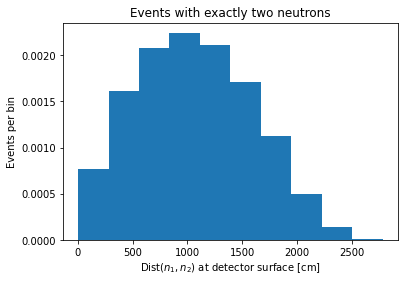

In [204]:
# dist_n1_n2: distance between the two neutrons at the detector surface
plot_histo(df_nn_kinematics, 'dist_n1_n2', 
           weight    = df_nn_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two neutrons", 
           x_label   = "Dist($n_1,n_2$) at detector surface [cm]",
           y_label   = "Events per bin",
           file_name = "dist_n1_n2")

### Two photons case
We move to events with two photons. We select photons using the `pdg` variable, that for photons is `22`.

In [208]:
# Select events with exactly two photons
def get_sum(df_bsm):
    return sum(df_bsm['pdg'])

def is_photon(df_bsm):
    """Returns number of photons in each event"""
    return sum(df_bsm['pdg'] == 22)


# We create a pandas series on the 'entry' index. It is a boolean series telling if each event has two photons
list_yy = df_bsm.groupby('entry').apply(get_sum)==44

# We create a pandas series on the 'entry' index. It is a boolean series telling if each event has AT LEAST two photons
list_multi_y = df_bsm.groupby('entry').apply(is_photon) > 1

In [209]:
# We convert the series into a 'mask' that we use to filter the dataframe
# mask_yy = list_yy[list_yy==True].index
mask_yy = list_multi_y[list_multi_y==True].index

In [210]:
# Here we filter
df_bsm_yy = df_bsm.loc[mask_yy]
df_bsm_yy.head(10)

E   pdg  detid  weight     theta       phi  \
entry subentry                                                      
68    7         0.000285    22   9000  1500.0  0.446183  0.542375   
      15        0.000204    22   9000  1500.0  1.011583  1.970796   
      16        0.001312    22   9000  1500.0  1.166942  2.119531   
150   7         0.004666    22   9000  1500.0  2.359974  0.788445   
      8         0.000379    22   9000  1500.0  2.200005  0.194827   
339   5         0.000108    22   9000  1500.0  2.452196  0.729076   
      13        0.003539    22   9000  1500.0  2.185869  0.510728   
641   5         0.000099    22   9000  1500.0  0.624277  1.803813   
      6         0.000077    22   9000  1500.0  0.769946  1.764397   
952   7         0.000003  2112   9000  1500.0  0.507394 -0.163325   

                       vtxx         vtxy          vtxz        px        py  \
entry subentry                                                               
68    7        -3977.517437 -2289.959790   9088.585037  0.000105  0.000064   
      15        1300.735955 -2549.295537  14433.195185 -0.000067  0.000160   
      16        1252.992626 -2514.935213  14446.397784 -0.000629  0.001029   
150   7        -1330.408837 -1964.554640  18110.882989  0.002317  0.002331   
      8        -1330.408837 -1964.554640  18110.882989  0.000301  0.000059   
339   5         -525.307686 -1527.415526  18274.586182  0.000051  0.000046   
      13       -2473.410100  -864.546022  18302.320041  0.002522  0.001413   
641   5         1212.854288 -2506.622042  13594.349720 -0.000013  0.000056   
      6         1212.854288 -2506.622042  13594.349720 -0.000010  0.000053   
952   7         -299.650616    91.482519   6999.097356  0.001202 -0.000198   

                      pz            x           y             z  
entry subentry                                                   
68    7         0.000257 -1002.500000 -954.109613  16133.832897  
      15        0.000108   301.500955 -110.707446  16000.000000  
      16        0.000516  -643.307002  586.807796  16000.000000  
150   7        -0.003312    21.872941 -604.006181  16178.060000  
      8        -0.000223  -740.843678   79.889556  16178.060000  
339   5        -0.000084   690.052796 -507.091011  16178.060000  
      13       -0.002042   149.648285  605.194213  16178.060000  
641   5         0.000080   222.085380  -85.058572  16000.000000  
      6         0.000055   641.252433 -429.233693  16000.000000  
952   7         0.002192  -110.954764 -139.046580  16000.000000

In [132]:
df_yy_kinematics = pd.DataFrame()

In [133]:
# Delta phi 
def delta_phi(df_yy_kinematics):
    d_phi = df_yy_kinematics['phi_1'] - df_yy_kinematics['phi_2']    
    if d_phi >= np.pi: d_phi = d_phi - 2*np.pi
    if d_phi < -np.pi: d_phi = d_phi + 2*np.pi
    return d_phi


# Copying TLorentzVector definition https://root.cern.ch/doc/master/TLorentzVector_8h_source.html#l00498
def inv_mass(E_1, px_1, py_1, pz_1,
             E_2, px_2, py_2, pz_2):
    return np.sqrt( np.absolute((E_1+E_2)**2 - (px_1+px_2)**2 - (py_1+py_2)**2 - (pz_1+pz_2)**2) )

In [134]:
# Dirty trick to have the first and second particles: create two separate dataframes
# with the first and last (~second) subentry
df_bsm_yy_first = df_bsm_yy.groupby('entry').first()
df_bsm_yy_second = df_bsm_yy.groupby('entry').last()

In [135]:
# Event variables
df_yy_kinematics["weight"] = df_bsm_yy_first["weight"]

# Build first particle
df_yy_kinematics["E_1"] = df_bsm_yy_first["E"]
df_yy_kinematics["m_1"] = 0.939565
df_yy_kinematics["eta_1"] = -np.log(np.tan(0.5*df_bsm_yy_first["theta"]))
df_yy_kinematics["theta_1"] = df_bsm_yy_first["theta"]
df_yy_kinematics["phi_1"] = df_bsm_yy_first["phi"]
df_yy_kinematics["vtxx_1"] = df_bsm_yy_first["vtxx"]
df_yy_kinematics["vtxy_1"] = df_bsm_yy_first["vtxy"]
df_yy_kinematics["vtxz_1"] = df_bsm_yy_first["vtxz"]
df_yy_kinematics["px_1"] = df_bsm_yy_first["px"]
df_yy_kinematics["py_1"] = df_bsm_yy_first["py"]
df_yy_kinematics["pz_1"] = df_bsm_yy_first["pz"]
df_yy_kinematics["x_1"] = df_bsm_yy_first["x"]
df_yy_kinematics["y_1"] = df_bsm_yy_first["y"]
df_yy_kinematics["z_1"] = df_bsm_yy_first["z"]

# Build second particle
df_yy_kinematics["E_2"] = df_bsm_yy_second["E"]
df_yy_kinematics["m_2"] = 0.939565
df_yy_kinematics["eta_2"] = -np.log(np.tan(0.5*df_bsm_yy_second["theta"]))
df_yy_kinematics["theta_2"] = df_bsm_yy_second["theta"]
df_yy_kinematics["phi_2"] = df_bsm_yy_second["phi"]
df_yy_kinematics["vtxx_2"] = df_bsm_yy_second["vtxx"]
df_yy_kinematics["vtxy_2"] = df_bsm_yy_second["vtxy"]
df_yy_kinematics["vtxz_2"] = df_bsm_yy_second["vtxz"]
df_yy_kinematics["px_2"] = df_bsm_yy_second["px"]
df_yy_kinematics["py_2"] = df_bsm_yy_second["py"]
df_yy_kinematics["pz_2"] = df_bsm_yy_second["pz"]
df_yy_kinematics["x_2"] = df_bsm_yy_second["x"]
df_yy_kinematics["y_2"] = df_bsm_yy_second["y"]
df_yy_kinematics["z_2"] = df_bsm_yy_second["z"]


In [136]:
# df_nn_kinematics["particle_1"] = Momentum4.e_m_eta_phi(df_nn_kinematics["E_1"],
#                                                       df_nn_kinematics["m_1"],
#                                                       df_nn_kinematics["eta_1"],
#                                                       df_nn_kinematics["phi_1"])

In [137]:
df_yy_kinematics["m_yy"] = inv_mass(df_yy_kinematics["E_1"], df_yy_kinematics["m_1"], df_yy_kinematics["eta_1"], df_yy_kinematics["phi_1"],
                                    df_yy_kinematics["E_2"], df_yy_kinematics["m_2"], df_yy_kinematics["eta_2"], df_yy_kinematics["phi_2"])

In [138]:
# particle distance from the center of the detector
df_yy_kinematics["r_1"] = np.sqrt(df_yy_kinematics["x_1"]**2 + df_yy_kinematics["y_1"]**2)
df_yy_kinematics["r_2"] = np.sqrt(df_yy_kinematics["x_2"]**2 + df_yy_kinematics["y_2"]**2)

# Distance between the two particles at the detector surface
df_yy_kinematics["dist_n1_n2"] = np.sqrt( (df_yy_kinematics["x_2"] - df_yy_kinematics["x_1"])**2 + (df_yy_kinematics["y_1"] - df_yy_kinematics["y_2"])**2)

In [139]:
# Delta_phi between photons
df_yy_kinematics["delta_phi"] = df_yy_kinematics.apply(delta_phi, axis = 1)
df_yy_kinematics[['E_1','E_2','phi_1','phi_2','delta_phi']].head(5)

,E_1,E_2,phi_1,phi_2,delta_phi
entry,,,,,
150,0.004666,0.000379,0.788445,0.194827,0.593618
339,0.000108,0.003539,0.729076,0.510728,0.218348
641,0.000099,0.000077,1.803813,1.764397,0.039416
961,0.000984,0.000984,1.020739,-0.473675,1.494414
1126,0.000641,0.000061,-0.114437,2.718520,-2.832957


In [140]:
# Having a look at the dataframe
df_yy_kinematics.head(5)

,weight,E_1,m_1,eta_1,theta_1,phi_1,vtxx_1,vtxy_1,vtxz_1,px_1,...,py_2,pz_2,x_2,y_2,z_2,m_yy,r_1,r_2,dist_n1_n2,delta_phi
entry,,,,,,,,,,,,,,,,,,,,,
150,1500.0,0.004666,0.939565,-0.886728,2.359974,0.788445,-1330.408837,-1964.554640,18110.882989,0.002317,...,0.000059,-0.000223,-740.843678,79.889556,16178.060000,2.634027,604.402094,745.138709,1024.426678,0.593618
339,1500.0,0.000108,0.939565,-1.024344,2.452196,0.729076,-525.307686,-1527.415526,18274.586182,0.000051,...,0.001413,-0.002042,149.648285,605.194213,16178.060000,2.810417,856.337641,623.421722,1236.614514,0.218348
641,1500.0,0.000099,0.939565,1.131073,0.624277,1.803813,1212.854288,-2506.622042,13594.349720,-0.000013,...,0.000053,0.000055,641.252433,-429.233693,16000.000000,4.516893,237.816898,771.651635,542.362915,0.039416
961,1500.0,0.000984,0.939565,0.422920,1.159947,1.020739,-1397.947708,-2536.097270,15313.794445,0.000471,...,-0.000228,0.000847,389.236292,-354.125381,16000.000000,2.606890,1101.987884,526.222079,1066.523283,1.494414
1126,1500.0,0.000641,0.939565,0.651939,0.960666,-0.114437,-3515.148252,443.968686,13201.885397,0.000522,...,0.000014,0.000051,1002.500000,-977.041924,16073.904702,3.710890,147.237391,1399.863268,1257.989271,-2.832957


In [141]:
import matplotlib.pyplot as plt

def plot_histo(df, variable, weight=1, title="", x_label="", y_label="", file_name=None, file_format="png"):
    """Plots distributions from a dataframe

    df: input dataframe
    variable: distribution to plot
    title: appears on top of the plot
    weight: weight to apply to the histogram
    x_label: label of x-axis
    y_label: label of y-axis
    file_name: if not empty, name of file where plot is printed
    file_format: if file_name not empty, format of output file
    """

    # Prepare histogram
    df[variable].plot(kind='hist', weights=weight)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Preparing output
    if file_name:
        plt.savefig(file_name + "." + file_format)
        


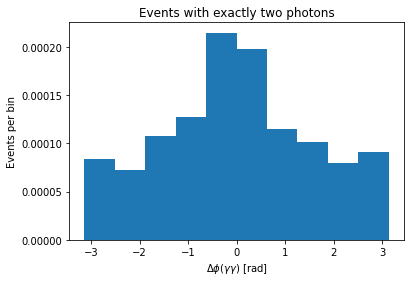

In [142]:
# Delta-phi(y,y)
plot_histo(df_yy_kinematics, 'delta_phi', 
           weight    = df_yy_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two photons", 
           x_label   = r"$\Delta \phi (\gamma \gamma)$ [rad]", 
           y_label   = "Events per bin",
           file_name = "delta_phi_yy")

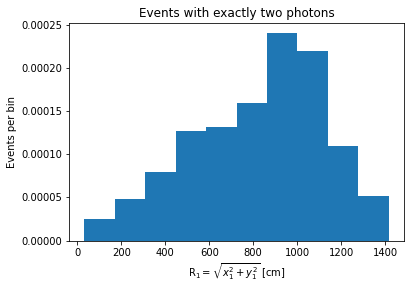

In [143]:
# r_1: distance of first photon from the center of the detector
plot_histo(df_yy_kinematics, 'r_1', 
           weight    = df_yy_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two photons", 
           x_label   = "R$_1 = \sqrt{x_1^2 + y_1^2}$ [cm]", 
           y_label   = "Events per bin",
           file_name = "r_1_yy")


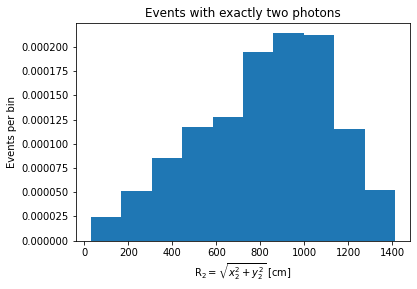

In [144]:
# r_2: distance of second photon from the center of the detector
plot_histo(df_yy_kinematics, 'r_2', 
           weight    = df_yy_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two photons", 
           x_label   = "R$_2 = \sqrt{x_2^2 + y_2^2}$ [cm]", 
           y_label   = "Events per bin",
           file_name = "r_2_yy")


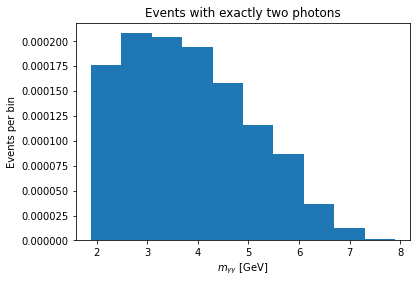

In [145]:
# m_yy: invariant mass of the two photons system
plot_histo(df_yy_kinematics, 'm_yy', 
           weight    = df_yy_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two photons", 
           x_label   = "$m_{\gamma \gamma}$ [GeV]",
           y_label   = "Events per bin",
           file_name = "m_yy")


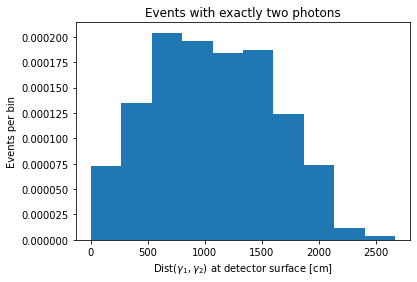

In [146]:
# dist_n1_n2: distance between the two photons at the detector surface
plot_histo(df_yy_kinematics, 'dist_n1_n2', 
           weight    = df_yy_kinematics['weight']/(1.5e9), 
           title     = "Events with exactly two photons", 
           x_label   = "Dist($\gamma_1,\gamma_2$) at detector surface [cm]",
           y_label   = "Events per bin",
           file_name = "dist_y1_y2")

In [ ]:


df_nn_kinematics['delta_phi'].plot(kind="hist", weights=df['weight']/(1.5e9))
plt.title("Events with exactly two neutrons")
plt.xlabel(r"$\Delta \phi$ [rad]")
plt.ylabel("Events per bin")

<AxesSubplot:ylabel='Frequency'>

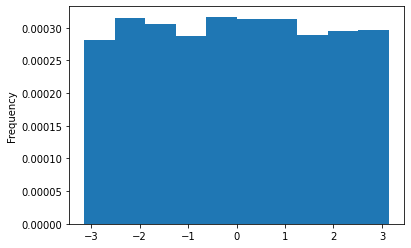

In [359]:
df_nn_kinematics['delta_phi'].plot(kind="hist", weights=df_nn_kinematics['weight']/(1.5e9))

In [ ]:
# reference example
def get_sum_E(df_bsm_nn):
    return sum(df_bsm_nn['E'])

df_nn_kinematics = pd.DataFrame()

df_nn_kinematics['sum_E'] = df_bsm_nn.groupby('entry').apply(get_sum_E)


In [ ]:
df_nn_kinematics.head(10)